In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

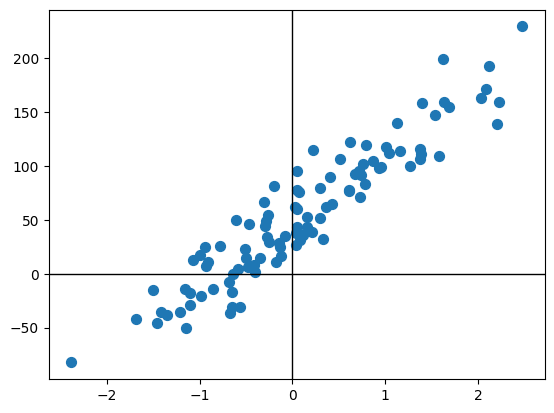

In [138]:
x,y=datasets.make_regression(n_samples=100,n_features=2,noise=20,random_state=4)
bias=np.random.uniform(40,50,100)
y_new=y+bias
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=40,random_state=1234)

plt.figure()
plt.scatter(x[:,0],y_new,s=50)
# plt.xlim(left=0)
# plt.ylim(bottom=0)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)

plt.show()

In [139]:
print(x_train.shape,y_train.shape)

(60, 2) (60,)


In [79]:
lr=LinearRegression()
lr.fit(x_train,y_train)

(1,)


In [112]:
from sklearn import datasets
import pandas as pd 
d=datasets.fetch_california_housing()


In [113]:
df=pd.DataFrame(d.data,columns=d.feature_names)

In [114]:
df['price']=d.target

In [115]:
print(df.shape)
df.head(10)

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [116]:
x_train,x_test,y_train,y_test=train_test_split(d.data,d.target,test_size=0.2,random_state=1234)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [140]:
class LinearReg():
    def __init__(self,n_iter=1000,lr=0.0001):
        self.n_iter=n_iter
        self.lr=lr
        self.weights=None
        self.bias=None

    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iter):
            y_pred=np.dot(x,self.weights) + self.bias
            dw=(2/n_samples)*np.dot(x.T,(y-y_pred))
            db=(2/n_samples)*np.sum(y_pred-y)
            self.weights-=self.lr*dw
            self.bias-=self.lr*db

    def predict(self,x_test):
        return np.dot(x_test,self.weights)

In [141]:
lreg=LinearReg()
lreg.fit(x_train,y_train)
pred=lreg.predict(x_test)

In [142]:
pred

array([  5.34633598,  19.59871933,  -8.82954991,   4.6464029 ,
        13.14382738,   1.10023532, -25.91846865,  -5.06250919,
        -0.40732898,   7.22520429,   6.20759521, -28.6962615 ,
        10.20913863, -16.92138127, -24.24138948,  -3.24673765,
       -18.07651005,   3.80175724,  -0.81436443,  -3.38817011,
         3.55124821,   1.90242949, -11.77999858,  10.50205116,
        12.30814239,  -8.63249524,  11.36138344, -23.61594273,
        12.91370877,  14.49318406,  -0.65489455,  -8.12870733,
       -13.08474502, -14.90690053, -24.50406562,   7.48608013,
        -6.02186773,  -8.35272576,  -8.53182466,   0.09159945])